In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.pyplot import figure

sns.set()
#df1_FL_Edu_Wages = pd.read_csv("Raw_Data/FloridaEduWages.csv")
#df2_FL_Occu_Wages = pd.read_csv("Raw_Data/FloridaOccuWages.csv")

df1_US_Edu_Wages = pd.read_csv("data_to_plot/USWages.csv")
df2_US_Occu_Wages = pd.read_csv("data_to_plot/USOccuWages.csv")
df3_Sex_Data = pd.read_csv("data_to_plot/USSexDiffWages.csv")

In [2]:
print(df1_US_Edu_Wages.info())
df1_US_Edu_Wages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 7 columns):
degree_name         146 non-null object
number_of_people    146 non-null int64
wage/salary         146 non-null float64
non-degree jobs     146 non-null int64
looking             146 non-null int64
looking_%           146 non-null float64
NDJ_%               146 non-null float64
dtypes: float64(3), int64(3), object(1)
memory usage: 8.1+ KB
None


,degree_name,number_of_people,wage/salary,non-degree jobs,looking,looking_%,NDJ_%
0,General Agriculture,10170,64601.69,454,163,1.60,4.46
1,Agriculture Production And Management,7770,68821.81,431,159,2.05,5.55
2,Agricultural Economics,3366,88461.45,114,49,1.46,3.39
3,Animal Sciences,10352,64785.17,349,214,2.07,3.37
4,Food Science,2514,77567.30,88,86,3.42,3.50


In [3]:
df2_US_Occu_Wages = df2_US_Occu_Wages.drop(["Unnamed: 0"], axis = 1)
print(df2_US_Occu_Wages.info())
df2_US_Occu_Wages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 4 columns):
occupation_field     471 non-null object
occupation_name      471 non-null object
non-college count    471 non-null int64
wage/salary          470 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 14.8+ KB
None


,occupation_field,occupation_name,non-college count,wage/salary
0,MGR,General And Operations Managers,7656,67345.60
1,MGR,Advertising And Promotions Managers,140,62164.49
2,MGR,Marketing And Sales Managers,3632,64885.18
3,MGR,Public Relations And Fundraising Managers,94,62861.04
4,MGR,Administrative Services Managers,1396,55248.99


In [4]:
print(df3_Sex_Data.info())
df3_Sex_Data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 7 columns):
degree_name     146 non-null object
male_%          146 non-null float64
male_wage       146 non-null float64
female_%        146 non-null float64
female_wage     146 non-null float64
male_count      146 non-null int64
female_count    146 non-null int64
dtypes: float64(4), int64(2), object(1)
memory usage: 8.1+ KB
None


,degree_name,male_%,male_wage,female_%,female_wage,male_count,female_count
0,General Agriculture,79.15,69877.11,20.85,48233.40,8050,2120
1,Agriculture Production And Management,77.18,75170.88,22.82,49261.90,5997,1773
2,Agricultural Economics,82.03,95632.87,17.97,60986.32,2761,605
3,Animal Sciences,50.99,81673.46,49.01,49959.10,5279,5073
4,Food Science,42.80,94409.63,57.20,64545.54,1076,1438


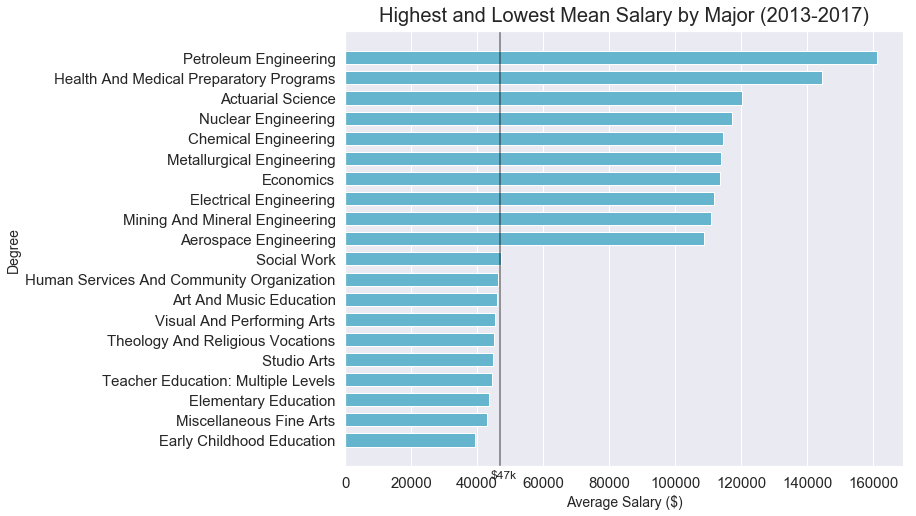

In [5]:
# Sort so we can use .head
df1_US_Edu_Wages = df1_US_Edu_Wages.sort_values("wage/salary", ascending=True)

# Set fig size
plt.figure(figsize=(10,8))

# Plot data
plt.barh(df1_US_Edu_Wages["degree_name"].head(10), df1_US_Edu_Wages["wage/salary"].head(10), color = "c", height=.65)
plt.barh(df1_US_Edu_Wages["degree_name"].tail(10), df1_US_Edu_Wages["wage/salary"].tail(10), color = "c", height=.65)

# Labels
plt.ylabel("Degree", fontsize=14)
plt.xlabel("Average Salary ($)", fontsize=14)
plt.title("Highest and Lowest Mean Salary by Major (2013-2017)", pad=10, fontsize=20)
plt.grid(axis="y")
plt.yticks(fontsize =15)
plt.xticks(fontsize=15)

# Mean Line
SalaryMean = 47016.45
plt.axvline(x=SalaryMean, color = "black", alpha=.5)
#plt.xticks(rotation=90, position= (10, 0), linespacing=1)
plt.text(44000,-1.9, "$47k", fontsize = 12)

# Create Image and display graph
plt.savefig("Figures/Mean_Salary.png")
plt.show()

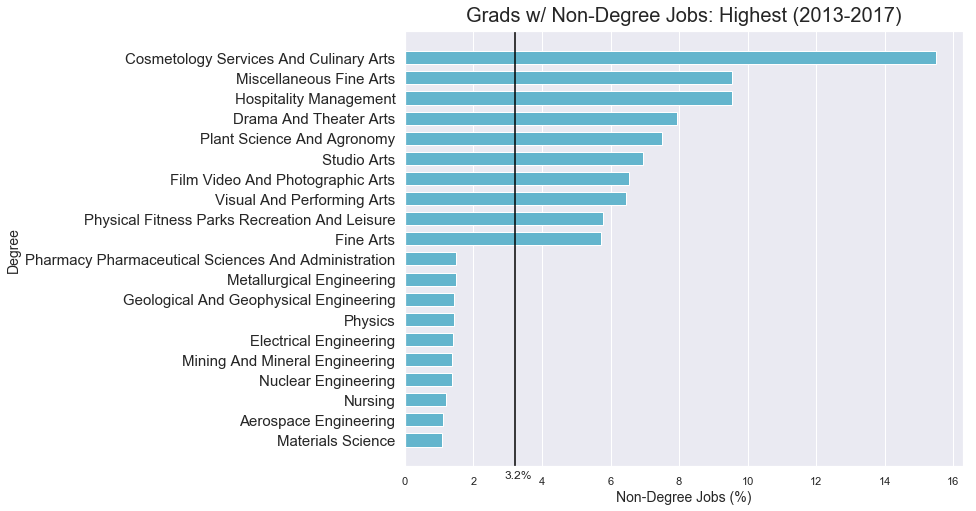

In [6]:
# Sort so we can use .head
df1_US_Edu_Wages = df1_US_Edu_Wages.sort_values("NDJ_%", ascending=True)

# Set fit size
plt.figure(figsize=(10,8))

# Plot data
plt.barh(df1_US_Edu_Wages["degree_name"].head(10), df1_US_Edu_Wages["NDJ_%"].head(10), color = "c", height=.65)
plt.barh(df1_US_Edu_Wages["degree_name"].tail(10), df1_US_Edu_Wages["NDJ_%"].tail(10), color = "c", height=.65)

# Labels
plt.ylabel("Degree", fontsize=14)
plt.xlabel("Non-Degree Jobs (%)", fontsize=14)
plt.title("Grads w/ Non-Degree Jobs: Highest (2013-2017)", pad=10, fontsize=20)
plt.yticks(fontsize =15)
plt.grid(axis="y")

# Mean Line
NDJMean = 3.20
plt.axvline(x=NDJMean, color = "black")
plt.text(2.9,-1.9, "%.1f" % NDJMean + "%" , fontsize=12)

# Create Image and display graph
plt.savefig("Figures/NDJ.png")
plt.show()

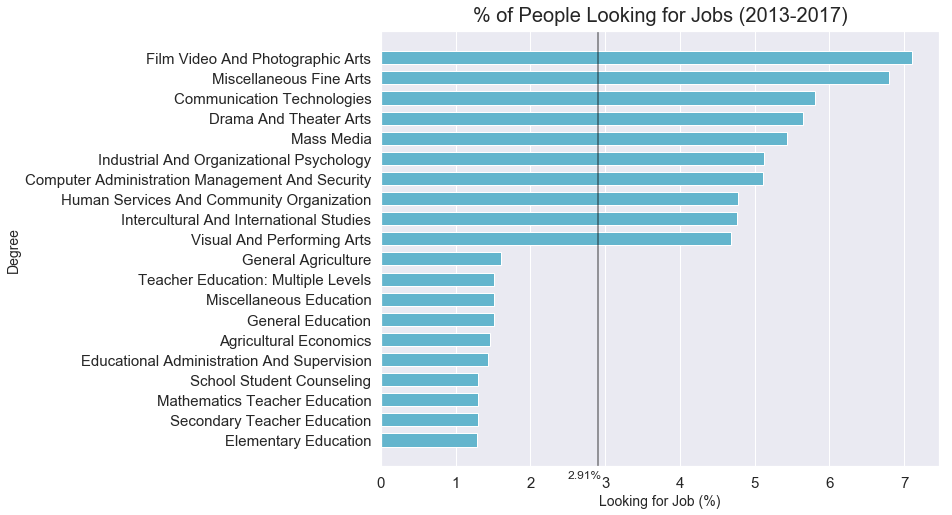

In [7]:
# Sort so we can use .head
df1_US_Edu_Wages = df1_US_Edu_Wages.sort_values("looking_%", ascending=True)

# Set fig size
plt.figure(figsize=(10,8))

# Plot data
plt.barh(df1_US_Edu_Wages["degree_name"].head(10), df1_US_Edu_Wages["looking_%"].head(10), color = "c", height=.65)
plt.barh(df1_US_Edu_Wages["degree_name"].tail(10), df1_US_Edu_Wages["looking_%"].tail(10), color = "c", height=.65)

# Labels
plt.ylabel("Degree", fontsize=14)
plt.xlabel("Looking for Job (%)", fontsize=14)
plt.title("% of People Looking for Jobs (2013-2017)", pad=10, fontsize=20)
plt.grid(axis="y")
plt.yticks(fontsize =15)
plt.xticks(fontsize=15)

# Mean Line
avgUnemp = 2.91
plt.axvline(x=avgUnemp, color = "black", alpha=.5)
plt.text(2.5,-1.9, "2.91%", fontsize = 12)

# Create Image and display graph
plt.savefig("Figures/LFJ.png")
plt.show()

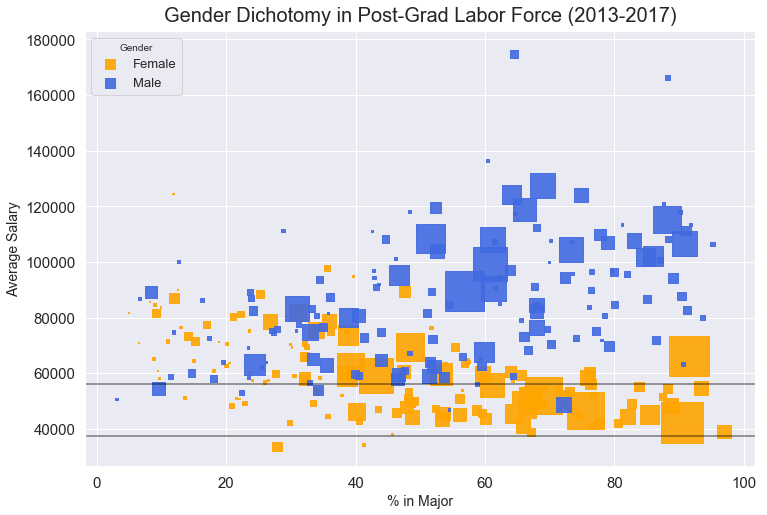

In [8]:
# Set fig size
plt.figure(figsize=(12,8))

# Plot data
plt.scatter(df3_Sex_Data['female_%'], df3_Sex_Data['female_wage'], alpha=0.9, s = df3_Sex_Data['female_count']/80, color = "orange", marker = 's')
plt.scatter(df3_Sex_Data['male_%'], df3_Sex_Data['male_wage'], alpha=0.9, s = df3_Sex_Data['male_count']/80, color = "royalblue", marker = 's')

# Labeling
plt.title("Gender Dichotomy in Post-Grad Labor Force (2013-2017)", pad=10, fontsize=20)
plt.ylabel('Average Salary', fontsize = 14)
plt.xlabel('% in Major', fontsize = 14)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

# Legend
legend_lables = ["Female", "Male"]
lgd = plt.legend(title= "Gender", labels = legend_lables, prop={'size': 13})
lgd.legendHandles[0]._sizes = [100]
lgd.legendHandles[1]._sizes = [100]

# Mean Lines
f_wage_mean = 56174.60
m_wage_mean = 37255.36
plt.axhline(y=m_wage_mean, color = 'black',alpha=.5)
plt.axhline(y=f_wage_mean, color = 'black', alpha=.5)

# Create Image and display graph
plt.savefig("Figures/gen1.png")
plt.show()

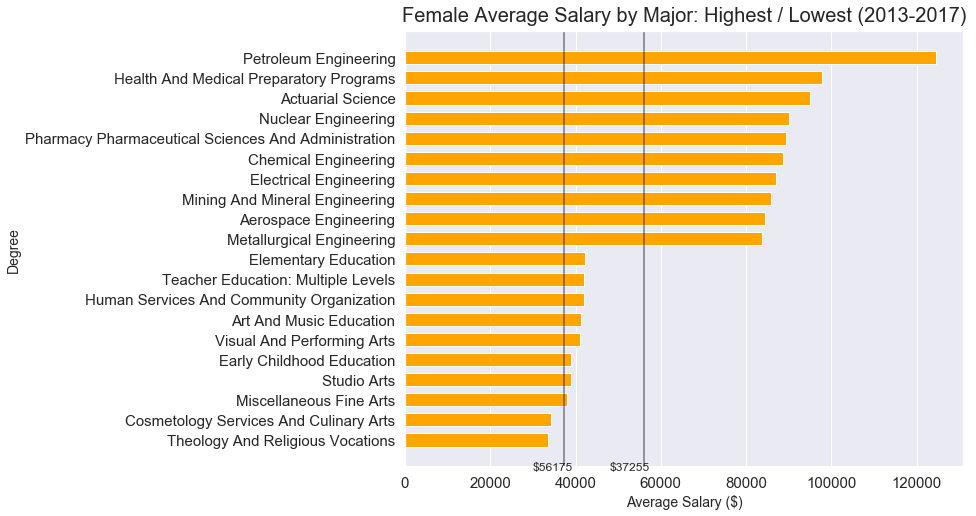

In [9]:
# Sort so we can use .head
df3_Sex_Data = df3_Sex_Data.sort_values("female_wage", ascending=True)

# Set fig size
plt.figure(figsize=(10,8))

# Plot data
plt.barh(df3_Sex_Data["degree_name"].head(10), df3_Sex_Data["female_wage"].head(10), color = "orange", height=.65)
plt.barh(df3_Sex_Data["degree_name"].tail(10), df3_Sex_Data["female_wage"].tail(10), color = "orange", height=.65)

# Labels
plt.ylabel("Degree", fontsize=14)
plt.xlabel("Average Salary ($)", fontsize=14)
plt.title("Female Average Salary by Major: Highest / Lowest (2013-2017)", pad=10, fontsize=20)
plt.grid(axis="y")
plt.yticks(fontsize =15)
plt.xticks(fontsize=15)

# Mean Line
plt.axvline(x=f_wage_mean, color = "black", alpha=.5)
plt.axvline(x=m_wage_mean, color = "black", alpha=.5)
plt.text(30000,-1.5, "$%.0f" % f_wage_mean, fontsize = 12)
plt.text(48000,-1.5, "$%.0f" % m_wage_mean, fontsize = 12)

# Create Image and display graph
plt.savefig("Figures/gen2.png")
plt.show()

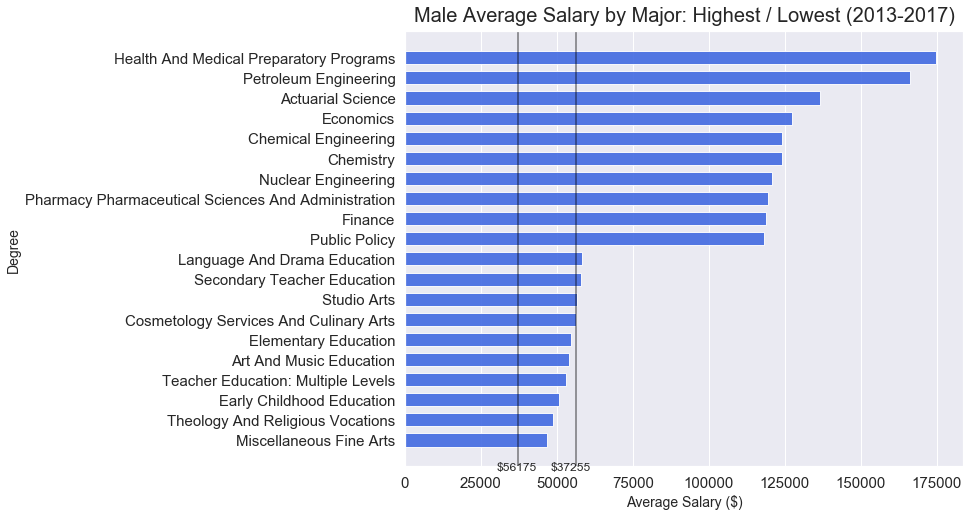

In [10]:
# Sort so we can use .head
df3_Sex_Data = df3_Sex_Data.sort_values("male_wage", ascending=True)

# Set fig size
plt.figure(figsize=(10,8))

# Plot data
plt.barh(df3_Sex_Data["degree_name"].head(10), df3_Sex_Data["male_wage"].head(10), color = "royalblue", height=.65, alpha=0.9)
plt.barh(df3_Sex_Data["degree_name"].tail(10), df3_Sex_Data["male_wage"].tail(10), color = "royalblue", height=.65, alpha=0.9)

# Labels
plt.ylabel("Degree", fontsize=14)
plt.xlabel("Average Salary ($)", fontsize=14)
plt.title("Male Average Salary by Major: Highest / Lowest (2013-2017)", pad=10, fontsize=20)
plt.grid(axis="y")
plt.yticks(fontsize =15)
plt.xticks(fontsize=15)

# Mean Lines
plt.axvline(x=m_wage_mean, color = "black", alpha=.5)
plt.axvline(x=f_wage_mean, color = "black", alpha=.5)
plt.text(48000,-1.5, "$%.0f" % m_wage_mean, fontsize = 12)
plt.text(30000,-1.5, "$%.0f" % f_wage_mean, fontsize = 12)

# Create Image and display graph
plt.savefig("Figures/gen3.png")
plt.show()

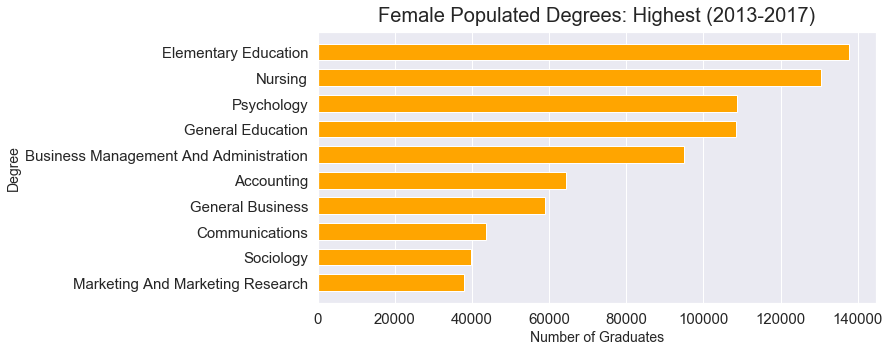

In [11]:
# Sort so we can use .head
df3_Sex_Data = df3_Sex_Data.sort_values("female_count", ascending=True)

# Set fig size
plt.figure(figsize=(10,5))

# Plot data
plt.barh(df3_Sex_Data["degree_name"].tail(10), df3_Sex_Data["female_count"].tail(10), color = "orange", height=.65)

# Labels
plt.ylabel("Degree", fontsize=14)
plt.xlabel("Number of Graduates", fontsize=14)
plt.title("Female Populated Degrees: Highest (2013-2017)", pad=10, fontsize=20)
plt.grid(axis="y")
plt.yticks(fontsize =15)
plt.xticks(fontsize=15)

# Create Image and display graph
plt.savefig("Figures/gen4.png")
plt.show()

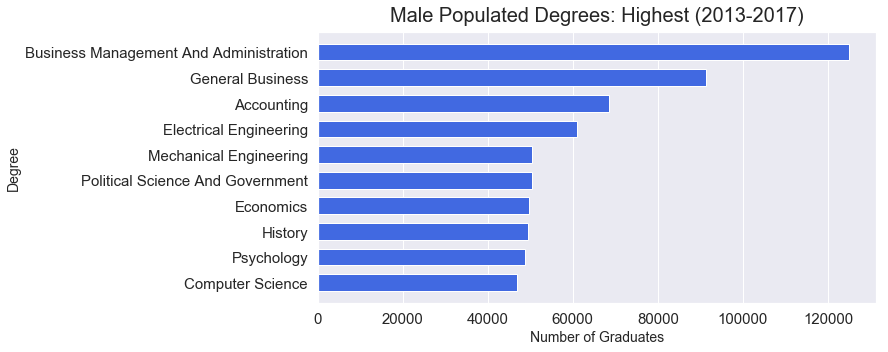

In [12]:
# Sort so we can use .head
df3_Sex_Data = df3_Sex_Data.sort_values("male_count", ascending=True)

# Set fig size
plt.figure(figsize=(10,5))

# Plot data
plt.barh(df3_Sex_Data["degree_name"].tail(10), df3_Sex_Data["male_count"].tail(10), color = "royalblue", height=.65)

# Labels
plt.ylabel("Degree", fontsize=14)
plt.xlabel("Number of Graduates", fontsize=14)
plt.title("Male Populated Degrees: Highest (2013-2017)", pad=10, fontsize=20)
plt.grid(axis="y")
plt.yticks(fontsize =15)
plt.xticks(fontsize=15)

# Create Image and display graph
plt.savefig("Figures/gen5.png")
plt.show()


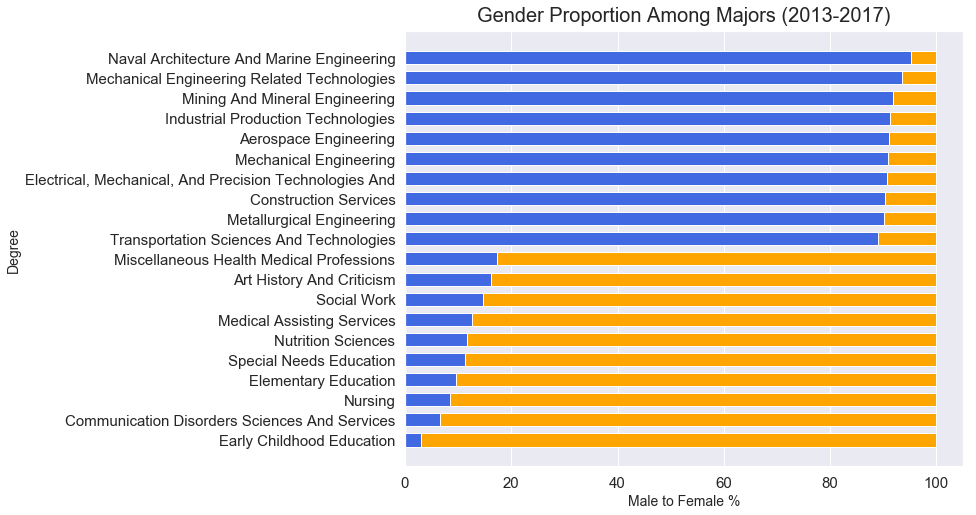

In [16]:
# Sort so we can use .head
df3_Sex_Data = df3_Sex_Data.sort_values("male_%", ascending=True)

# Set fig size
plt.figure(figsize=(10,8))

# Plot data
plt.barh(df3_Sex_Data["degree_name"].head(10), df3_Sex_Data["male_%"].head(10), color = "royalblue", height=.65)
plt.barh(df3_Sex_Data["degree_name"].head(10), df3_Sex_Data["female_%"].head(10), color = "orange", height=.65, left= df3_Sex_Data['male_%'].head(10))
plt.barh(df3_Sex_Data["degree_name"].tail(10), df3_Sex_Data["male_%"].tail(10), color = "royalblue", height=.65)
plt.barh(df3_Sex_Data["degree_name"].tail(10), df3_Sex_Data["female_%"].tail(10), color = "orange", height=.65, left= df3_Sex_Data['male_%'].tail(10))

# Labels
plt.ylabel("Degree", fontsize=14)
plt.xlabel("Male to Female %", fontsize=14)
plt.title("Gender Proportion Among Majors (2013-2017)", pad=10, fontsize=20)
plt.grid(axis="y")
plt.yticks(fontsize =15)
plt.xticks(fontsize=15)

# Create Image and display graph
plt.savefig("Figures/gen6.png")
plt.show()